Note: Discussed HW with Chaitanya Patil, Darshan Shinde and Piyush Vyas

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import soundfile as sndfl

In [2]:
def stft(signal, N, window_type, window_length, L, fs):
    
    if window_type == "hamming":
        w_m = np.hamming(window_length)
    else:
        return

    w_m =  np.flip(w_m)
    
    i = 0
    len_signal = len(signal)

    segments = []
    while i < len_signal:
        if (window_length + i < len_signal):
            segment = signal[i: window_length+i]
        else:
            temp = signal[i:]
            segment = np.zeros(window_length)
            segment[:temp.shape[0]] = temp
            M = np.arange(i, len(signal))
        
        segments.append(segment)
        i+=L
        
    segments = np.array(segments)    
    
    w_m = np.array([w_m]*len(segments))   
    
    prod = np.multiply(segments, w_m)
     
    E = []
    for k in range(N):
        e_row = []
        for m in range(k*L, k*L+window_length):
            e = -2j*np.pi*k*m/N
            e_row.append(e)
        E.append(e_row)
    
    exp = np.array(np.exp(E))
        
    X_temp = np.dot(prod, exp.T)
    
    X = 20*np.log10(np.abs(X_temp.T))
    
    plt.figure()
    plt.suptitle("Power Spectrum")
    plt.title("Window length = " + str(int(window_length*1000/fs)) + " Hop Length = " + str(int(L*1000/fs)))
    plt.xlabel("time (in s)")
    plt.ylabel("frequency")
    plt.imshow(X, interpolation = 'nearest', aspect = 'auto', origin = 'lower')
    return X_temp

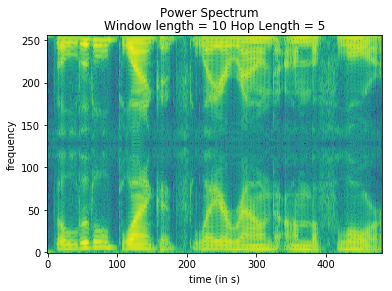

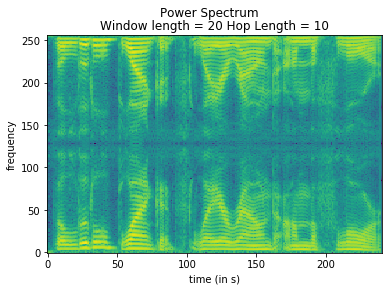

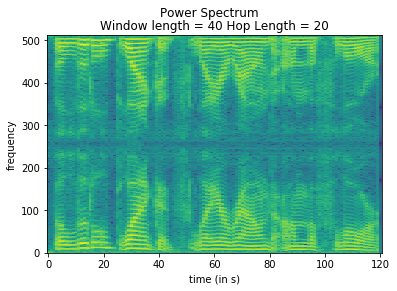

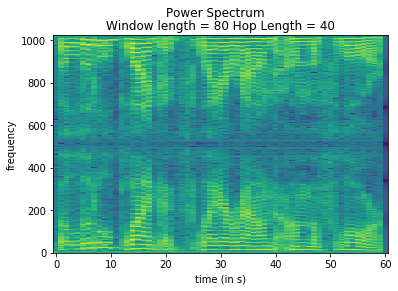

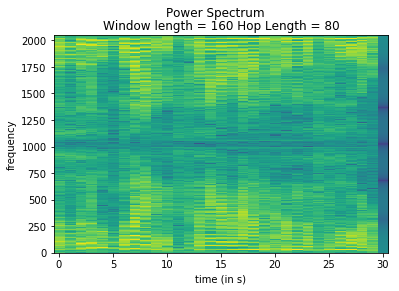

In [3]:
signal, fs = sndfl.read("speech2.wav")
N = [256, 256, 512, 1024, 2048]
window_type = "hamming"
window_length = [10, 20, 40, 80, 160]
L = [5, 10, 20, 40, 80]
X = []
for i in range(len(N)):
    x = stft(signal, N[i], window_type, int(window_length[i]*fs/1000), int(L[i]*fs/1000), fs)
    X.append(x)

## Differences in above plots
As discussed in the lecture -
<ol>
<li>Long window length has short bandwidth in frequency and poor temporal structure (as seen in the last 2 plots) </li>
<li>And short window length has long bandwidth in frequency and fine temporal structure as seen in the first 2 plots) </li>
    </ol>

In [4]:
def ola(X, N, window_length, L, fs, len_signal, x_axis):
    window = np.hamming(window_length)
    window = np.fft.fft(window)
    w0 = window[0]
    
    E = []
    for k in range(N):
        e_row = []
        for m in range(k*L, k*L+window_length):
            e = 2j*np.pi*k*m/N
            e_row.append(e)
        E.append(np.array(e_row))
    
    exp = np.exp(np.array(E)) 
    
    prod = np.dot(X, exp)

    x_axis = (prod.shape[0]-1)*L + window_length
    main = np.zeros((x_axis, prod.shape[0]), dtype = complex).T
    
    hop = 0
    for i in range(prod.shape[0]):
        main[i, hop*L: (hop*L)+window_length] = prod[i]
        hop += 1
        
    main = np.sum(main, axis= 0)
    main = (L*main)/(N*w0)

    plt.suptitle("Time Domain Signal")
    plt.title("Window length = " + str(int(window_length*1000/fs)) + " Hop Length = " + str(int(L*1000/fs)))
    plt.xlabel("time (in s)")
    plt.ylabel("amplitude")
    time = np.arange(0, x_axis/fs, 1/fs)
    plt.plot(time, main)
    plt.show()

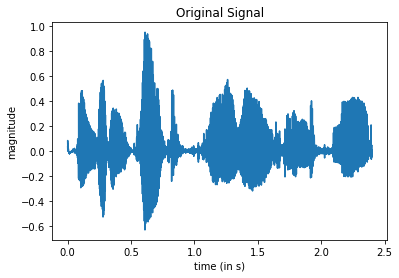

D:\Anaconda\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


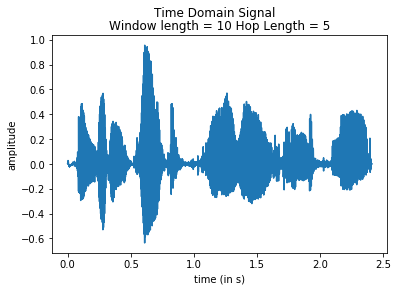

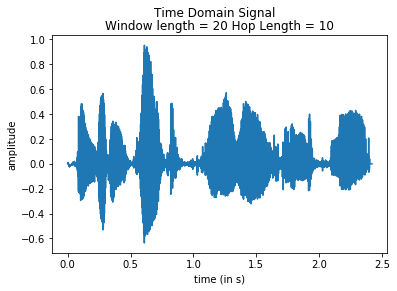

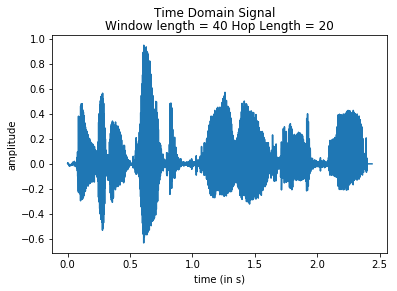

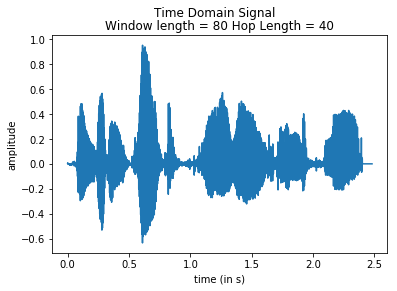

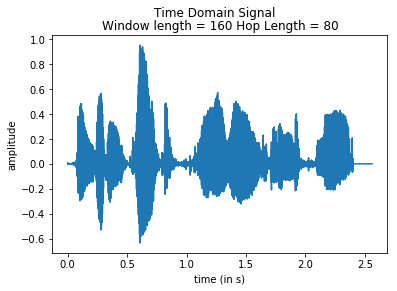

In [5]:
plt.figure()
plt.title("Original Signal")
x_axis = np.arange(0, len(signal)/fs, 1/fs)
plt.xlabel("time (in s)")
plt.ylabel("magnitude")
plt.plot(x_axis, signal)
plt.show()
for i in range(len(N)):
    ola(X[i], N[i], int(window_length[i]*fs/1000), int(L[i]*fs/1000), fs, len(signal), x_axis)

## Similarities in the above Plots
Process of converting time domain signal to frequency domain and back to time domain is a lossless process 